In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.express as px
import seaborn as sns

import nltk
import nltk.stem
import nltk.corpus 
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
sr_ = Style.RESET_ALL

In [2]:
df = pd.read_csv(r'./data/news_articles.csv', encoding="latin", index_col=0)
df = df.dropna()
df.count()

published                  2045
title                      2045
text                       2045
language                   2045
site_url                   2045
main_img_url               2045
type                       2045
label                      2045
title_without_stopwords    2045
text_without_stopwords     2045
hasImage                   2045
dtype: int64

In [3]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [4]:
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


### **Required**
#### Run One time

In [5]:
type1 = {'bias': 0, 'conspiracy': 1,'fake': 2,'bs': 3,'satire': 4, 'hate': 5,'junksci': 6, 'state': 7}
df.type = [type1[item] for item in df.type] 

In [6]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

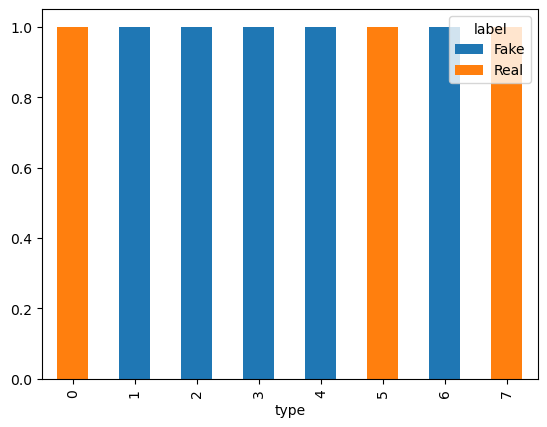

In [7]:
plot_bar(df,'type' , 'label')
plt.show()

### **Required**

In [8]:
df1 = df.sample(frac=1)
df1.head()

,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
author,,,,,,,,,,,
No Author,2016-10-27T03:27:17.846+03:00,erste bank open murray beats klizan,fastest electric commuter ferry unveiled in sw...,english,presstv.ir,http://media.presstv.com/photo/20161027/4d201e...,7,Real,israel settlements legal trump aide says playi...,politics iranian foreign minister mohammad jav...,1.0
No Author,2016-10-28T03:27:00.000+03:00,trump accuses obama hillary clinton of foundin...,email \nthe second presidential debate flew of...,english,awdnews.com,http://awdnews.com/images/147759640151aefcd3f-...,1,Fake,trump accuses obama hillary clinton founding d...,email second presidential debate flew rails su...,1.0
Alex Ansary,2016-10-31T19:54:37.919+02:00,wikileaks assange promises hillarys arrest wit...,carter reveals upgrades to us long range rocke...,english,amtvmedia.com,http://www.amtvmedia.com/wp-content/uploads/20...,3,Fake,wikileaks assange promises hillarys arrest nex...,carter reveals upgrades us long range rocket s...,1.0
Kim Petersen,2016-11-07T02:00:00.000+02:00,political prisoner takes on us militaryindustr...,if you cant give something away change is need...,english,ahtribune.com,http://ahtribune.com/images/media/Julian_Assan...,3,Fake,political prisoner takes us militaryindustrial...,cant give something away change needed httpwww...,1.0
Dr. Patrick Slattery,2016-11-09T20:23:49.158+02:00,dr david duke and pastor dankof discuss the ma...,views share \ndr david duke releases an inter...,english,davidduke.com,https://s0.wp.com/i/blank.jpg,5,Real,dr david duke pastor dankof discuss magnificen...,views share dr david duke releases interview u...,1.0


In [35]:
y = df1['type']
x = df1.loc[:, ['site_url','text_without_stopwords']]
x['source'] = x['site_url'].astype(str) + " "+x["text_without_stopwords"]
x = x.drop(['site_url', 'text_without_stopwords'], axis=1)
x = x.source
print(x)

author
No Author               presstv.ir politics iranian foreign minister m...
No Author               awdnews.com email second presidential debate f...
Alex Ansary             amtvmedia.com carter reveals upgrades us long ...
Kim Petersen            ahtribune.com cant give something away change ...
Dr. Patrick Slattery    davidduke.com views share dr david duke releas...
                                              ...                        
No Author               presstv.ir news bulletin shea weber montreal c...
admin                   prisonplanet.com latest hacked email released ...
crazyewok               abovetopsecret.com well finally big global bus...
Isaac Davis             dcclothesline.com posted tim brown monday man ...
Phyllis Chesler         frontpagemag.com weiner sexting yearold girl l...
Name: source, Length: 2045, dtype: object


In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(x_train)
tfidf_test = tfidf_vect.transform(x_test)
x_train[1]


'legorafi.fr keywords food packaging packaging one major reasons lots people choose organic foods avoid exposure chemicals however organic foods beans often come packaging done well lots chemicals present greatly interfere normal physiology especially wrong choice packaging company various types food packaging possibly leach compounds food investigate packaging kitchen youll observe lot materials concerned regardless possibility youre part real food type individual presumably canned merchandise oats pastas granola bars packaged plastic bags plastic wrap plastic storage washroom far food refreshment cans seem accounts made metals like steel aluminum reality lined bpa bps deplorable substitutes like polyvinyl chloride pvc contains known cancercausing agent vinyl chloride canned soup soda significantly seltzer juices likely exposing bpa different compounds youre ideal situation ingesting even packaging made evidently amiable paper might lined chemicals concern like pfass found pizza boxes

In [11]:
tfidf_train.shape

(1431, 39268)

In [29]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(tfidf_train, y_train)
y_pred3 = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred3)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.954


In [86]:
Rando = RandomForestClassifier(n_estimators=100,random_state=0)
Rando.fit(tfidf_train,y_train)
y_pred1 = Rando.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred1)
print("accuracy:  %0.3f" %RFscore)
print(y_pred1)


accuracy:  0.878
[3 3 0 1 1 1 0 0 0 7 3 0 3 5 0 3 3 5 1 3 0 1 3 0 3 3 3 3 3 3 3 3 1 0 3 5 0
 4 3 1 7 0 1 3 3 3 3 1 4 5 3 0 5 5 3 1 5 3 5 0 3 0 3 3 3 0 1 3 3 3 3 7 3 3
 3 3 0 0 5 3 1 5 0 3 3 3 5 3 4 4 6 1 0 0 3 3 1 3 1 3 1 4 3 3 0 3 5 5 5 3 0
 0 5 3 7 3 1 3 1 0 1 5 4 4 0 4 4 3 3 5 3 0 3 1 0 5 1 3 7 1 5 5 1 3 4 3 0 3
 3 1 6 3 7 0 0 3 4 6 3 3 1 0 0 5 7 4 3 3 0 3 1 7 3 5 3 0 0 5 3 3 1 1 4 1 1
 3 3 7 4 3 5 3 3 3 3 3 3 1 3 1 4 0 5 0 3 1 1 3 3 3 3 3 3 3 3 3 3 5 7 0 0 6
 0 3 1 1 1 5 0 0 3 1 5 1 0 5 1 3 3 3 0 1 3 1 4 5 1 0 1 6 3 7 7 0 1 3 1 1 3
 1 4 0 3 3 3 0 3 1 1 3 0 0 0 3 0 1 3 3 0 3 1 0 5 0 0 0 3 3 1 1 3 0 1 3 4 1
 1 3 0 1 0 6 6 5 3 3 0 0 3 1 3 5 5 4 3 5 0 7 3 3 0 7 0 0 0 3 3 7 3 4 5 3 0
 5 1 2 3 5 1 4 3 0 5 0 3 7 3 1 0 1 0 0 0 0 0 1 1 6 3 3 0 5 0 1 3 7 0 0 3 4
 3 7 5 1 0 1 5 3 6 0 0 3 3 1 1 3 1 3 4 3 4 0 7 3 3 3 6 1 3 4 5 0 3 3 3 3 3
 6 1 1 3 1 3 3 0 1 1 3 0 3 4 3 1 3 1 6 3 4 1 0 1 0 4 3 3 5 1 3 3 3 5 3 0 7
 3 5 7 1 0 5 1 3 1 1 0 5 7 3 5 3 3 0 3 0 0 3 3 1 4 3 3 0 3 3 1 3 5 3 5 7 0
 0 1 3 0

In [74]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
import string
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\simon\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [83]:
def preprocess_text(text):

    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    # Tokenize the text into words
    words = word_tokenize(text.lower())

    words = [word for word in words if word not in string.punctuation]

    # Remove stop words
    stop_words = stopwords.words('english')
    words = [word for word in text.split() if word not in (stop_words)]
    words = " ".join([word for word in words if word.isalpha()]).lower()    
    
    return words


john littlejohn december may english tradesman methodist preacher served sheriff loudoun county virginia war born penrith cumberland briefly attended trade school london returning penrith when around twelve years old littlejohn immigrated thirteen colonies pursue various apprenticeships tradesmen virginia maryland while particularly religious youth inspired methodist revivalist sermons began service circuit rider outbreak


In [85]:
import requests
from bs4 import BeautifulSoup
from time import sleep

URL = "https://en.wikipedia.org/wiki/John_Littlejohn_(preacher)"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')

text = ''

# Find all <p> elements and print their text
for paragraph in soup.find_all('p'):
    text += paragraph.get_text()

# processed_text = ' '.join(preprocessed_text(text))
print(preprocess_text(text))
    

john littlejohn december may english tradesman methodist preacher served sheriff loudoun county virginia war born penrith cumberland briefly attended trade school london returning penrith when around twelve years old littlejohn immigrated thirteen colonies pursue various apprenticeships tradesmen virginia maryland while particularly religious youth inspired methodist revivalist sermons began service circuit rider outbreak revolutionary warin preaching traveled across early united states including virginia maryland delaware washington dc after several years itinerancy settled leesburg virginia there served local preacher saddler several decades occasionally county magistrate sheriff tax collector as loudoun county sheriff british raid washington protected safehouse containing relocated national archives including constitution declaration independence in moved family kentucky served land agent preaching alongside work travel across state he retired logan county southern kentucky became s